In [1]:
# Installing required packages

import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from bs4 import BeautifulSoup

In [2]:
# API endpoint
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the JSON data from the response
    data = response.json()
    
    # Extract the episodes data
    episodes = data["_embedded"]["episodes"]
    
    # Initialize lists to store the extracted attributes
    id_list = []
    url_list = []
    name_list = []
    season_list = []
    number_list = []
    type_list = []
    airdate_list = []
    airtime_list = []
    runtime_list = []
    average_rating_list = []
    summary_list = []
    medium_image_link_list = []
    original_image_link_list = []
    
    # Iterate over each episode and extract the required attributes
    for episode in episodes:
        id_list.append(episode["id"])
        url_list.append(episode["url"])
        name_list.append(episode["name"])
        season_list.append(episode["season"])
        number_list.append(episode["number"])
        type_list.append(episode["type"])
        
        # Format the date in the desired format
        airdate = datetime.strptime(episode["airdate"], "%Y-%m-%d").date()
        airdate_list.append(airdate)
        
        # Format the time in 12-hour format
        airtime = datetime.strptime(episode["airtime"], "%H:%M").strftime("%I:%M %p")
        airtime_list.append(airtime)
        
        runtime_list.append(episode["runtime"])
        average_rating_list.append(episode["rating"]["average"])
        
        # Remove HTML tags from the summary
        summary = episode["summary"].replace("<p>", "").replace("</p>", "")
        summary_list.append(summary)
        
        medium_image_link_list.append(episode["image"]["medium"])
        original_image_link_list.append(episode["image"]["original"])
        
    # Create a dataframe from the extracted attributes
    dataset = pd.DataFrame({
        "id": id_list,
        "url": url_list,
        "name": name_list,
        "season": season_list,
        "number": number_list,
        "type": type_list,
        "airdate": airdate_list,
        "airtime": airtime_list,
        "runtime": runtime_list,
        "average rating": average_rating_list,
        "summary": summary_list,
        "medium image link": medium_image_link_list,
        "original image link": original_image_link_list
    })
else:
    print("Error:", response.status_code)


In [3]:
dataset.head(2)     # Top 2 records of the dataset

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [4]:
dataset.groupby("season")["average rating"].mean().reset_index()

,season,average rating
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


In [5]:
season_ratings = dataset.groupby("season")["average rating"].mean().reset_index()

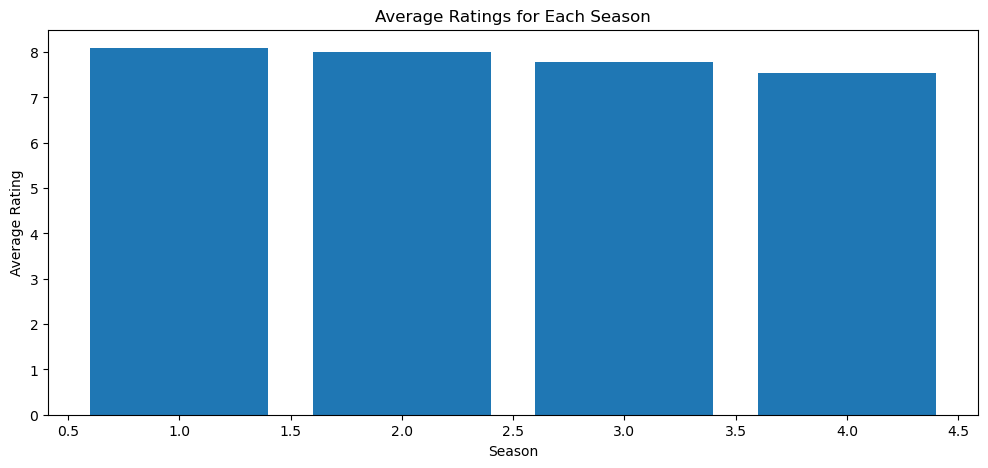

In [6]:
# Plotting the ratings for each seasons

plt.figure(figsize=(12, 5))
plt.bar(season_ratings["season"], season_ratings["average rating"])
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Season")
plt.show()

In [7]:
dataset[dataset['average rating'] > 8]

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,09:00 PM,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,09:00 PM,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,09:00 PM,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,09:00 PM,60,8.7,Another of Westworld's Host revolutionaries is...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,09:00 PM,60,8.4,The Man learns that his grip on reality isn't ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
19,1459790,https://www.tvmaze.com/episodes/1459790/westwo...,The Passenger,2,10,regular,2018-06-24,09:00 PM,90,8.5,"The Man faces a personal reckoning, while Akec...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [8]:
episodes_more_than_8 = dataset[dataset['average rating'] > 8]

In [9]:
episodes_more_than_8  = episodes_more_than_8.groupby('season')['name'].apply(list)

In [10]:
for i, j in episodes_more_than_8.items():
    print(f"Season {i}: {j}")

Season 1: ["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind']
Season 2: ['Kiksuya', 'Vanishing Point', 'The Passenger']


In [11]:
episode_names_2019 = []

# Iterating over each episode and extracting the required attributes
for episode in episodes:
    airdate = episode["airdate"]
    episode_name = episode["name"]
    
    # Checking if the episode aired before May 2019
    if airdate < "2019-05-01":
        episode_names_2019.append(episode_name)

# Displaying the episode names that aired before May 2019
for name in episode_names_2019:
    print(name)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


In [12]:
dataset.groupby('season')['average rating'].idxmax()

season
1     9
2    17
3    20
4    32
Name: average rating, dtype: int64

In [13]:
highest = dataset.groupby('season')['average rating'].idxmax()

In [14]:
highest

season
1     9
2    17
3    20
4    32
Name: average rating, dtype: int64

In [15]:
print("Episode Name with Highest Rating \n")
for i, j in highest.items():
    print(f"Season {i} : {dataset.loc[j, 'name']}")

Episode Name with Highest Rating 

Season 1 : The Bicameral Mind
Season 2 : Kiksuya
Season 3 : Parce Domine
Season 4 : Zhuangzi


In [16]:
dataset.groupby('season')['average rating'].idxmin()

season
1     2
2    14
3    25
4    28
Name: average rating, dtype: int64

In [17]:
lowest = dataset.groupby('season')['average rating'].idxmin()

In [18]:
print("Episode Name with Lowest Rating : \n ")
for i, j in lowest.items():
    print(f"Season {i} : {dataset.loc[j, 'name']}")

Episode Name with Lowest Rating : 
 
Season 1 : The Stray
Season 2 : Akane No Mai
Season 3 : Decoherence
Season 4 : The Auguries


In [19]:
dataset.groupby('season')['average rating'].idxmax()

season
1     9
2    17
3    20
4    32
Name: average rating, dtype: int64

In [22]:
most_popular = dataset.groupby('season')['average rating'].idxmax()

In [24]:
for i, j in most_popular.items():
    print(f"- Summary for the most popular episode in season {i}:")
    print(dataset.loc[j, 'summary'])
    print("---------------------------------------------------------------------------------------------------------")

- Summary for the most popular episode in season 1:
Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.
---------------------------------------------------------------------------------------------------------
- Summary for the most popular episode in season 2:
Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.
---------------------------------------------------------------------------------------------------------
- Summary for the most popular episode in season 3:
If you're stuck in a loop, try walking in a straight line.
---------------------------------------------------------------------------------------------------------
- Summary for the most popular episode in season 4:
God is bored.
------------------------